In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

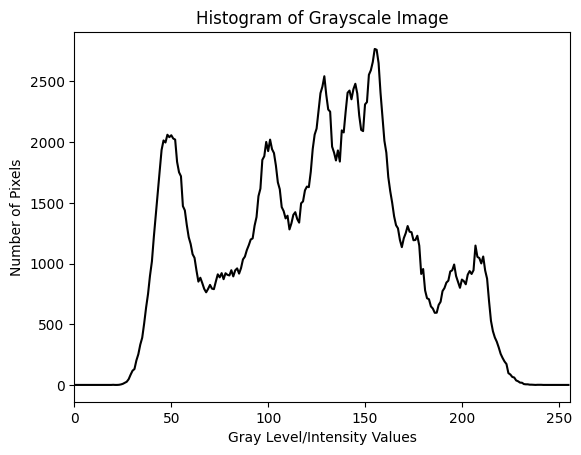

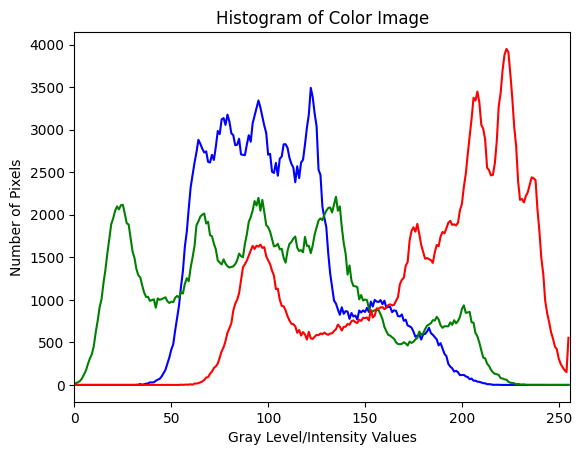

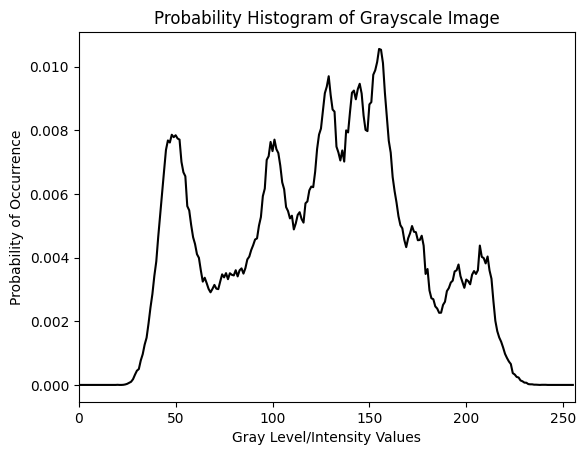

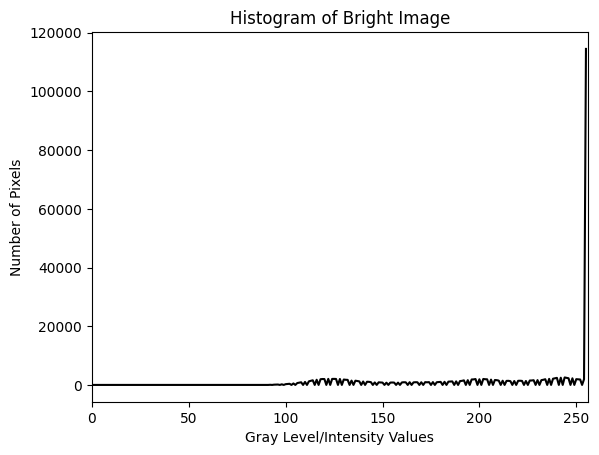

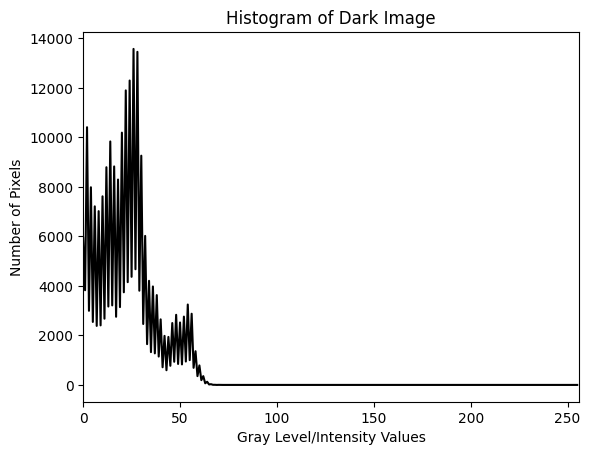

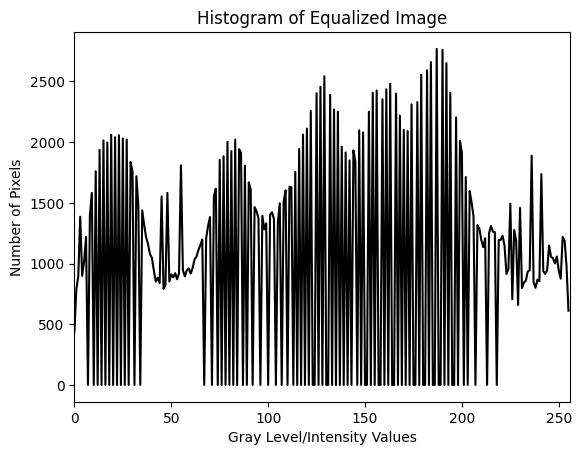

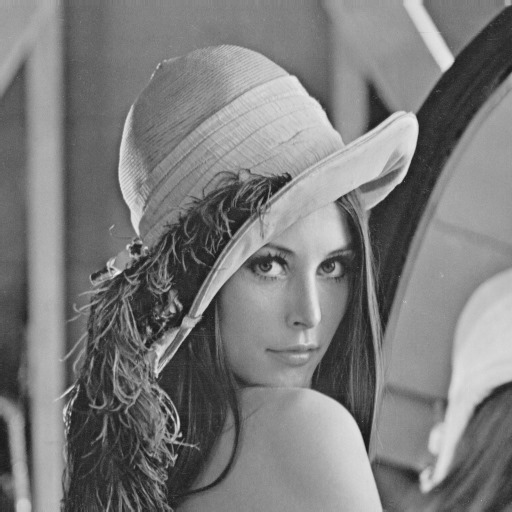

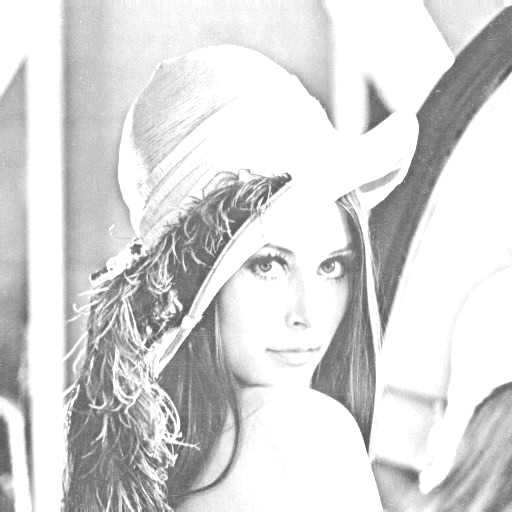

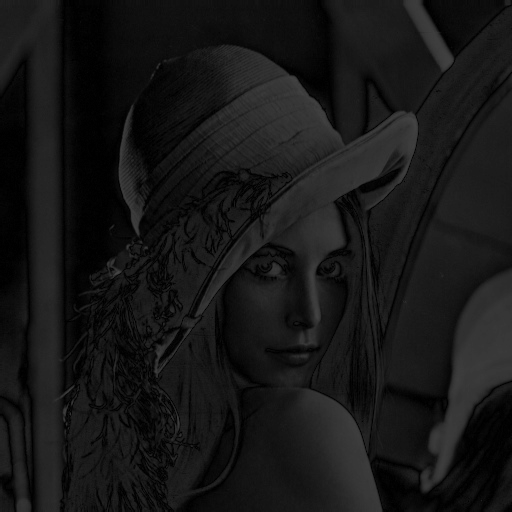

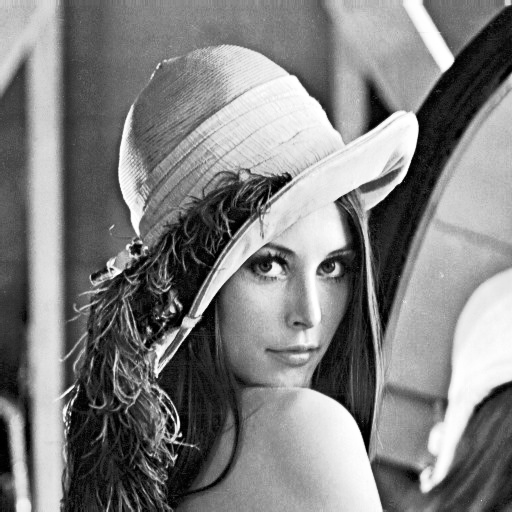

In [ ]:
def compute_histogram(image, is_gray=False):
    if is_gray:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:
        hist = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    return hist

def plot_histogram(hist, title, color=('b', 'g', 'r')):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level/Intensity Values")
    plt.ylabel("Number of Pixels")
    if isinstance(hist, list):
        for i, col in enumerate(color):
            plt.plot(hist[i], color=col)
    else:
        plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()

def plot_probability_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level/Intensity Values")
    plt.ylabel("Probability of Occurrence")
    hist_norm = hist / hist.sum()
    plt.plot(hist_norm, color='black')
    plt.xlim([0, 256])
    plt.show()

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def main():
    img_color = cv2.imread('/content/img1.jpeg')
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    hist_gray = compute_histogram(img_gray, is_gray=True)
    hist_color = compute_histogram(img_color)

    plot_histogram(hist_gray, "Histogram of Grayscale Image")
    plot_histogram(hist_color, "Histogram of Color Image")

    plot_probability_histogram(hist_gray, "Probability Histogram of Grayscale Image")

    bright_img = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=50)
    dark_img = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=-50)

    hist_bright = compute_histogram(bright_img, is_gray=True)
    hist_dark = compute_histogram(dark_img, is_gray=True)

    plot_histogram(hist_bright, "Histogram of Bright Image")
    plot_histogram(hist_dark, "Histogram of Dark Image")

    equalized_img = histogram_equalization(img_gray)
    hist_equalized = compute_histogram(equalized_img, is_gray=True)

    plot_histogram(hist_equalized, "Histogram of Equalized Image")

    cv2_imshow(img_gray)
    cv2_imshow(bright_img)
    cv2_imshow(dark_img)
    cv2_imshow(equalized_img)

if __name__ == "__main__":
    main()

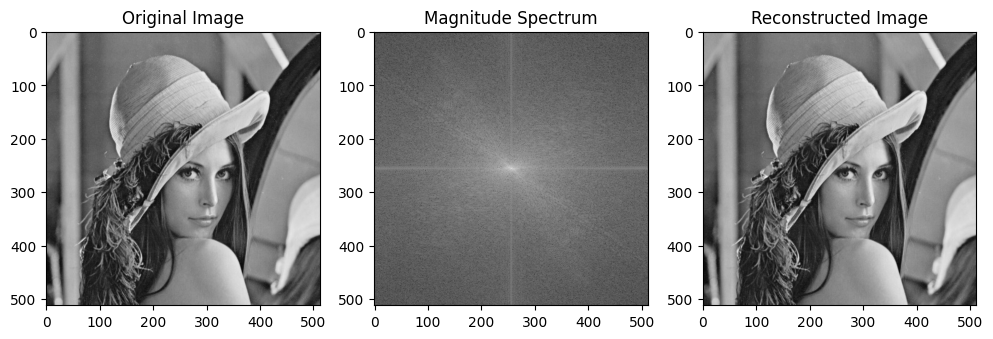

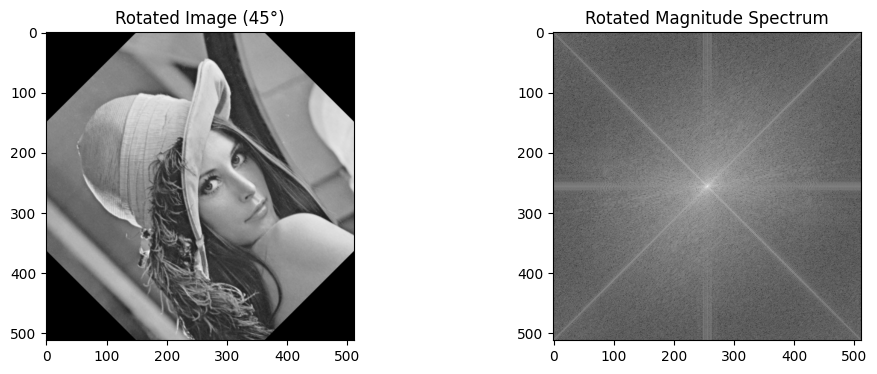

In [ ]:
def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

def inverse_fft(dft):
    idft_shift = np.fft.ifftshift(dft)
    img_reconstructed = np.fft.ifft2(idft_shift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated

def main():
    img = cv2.imread("/content/img1.jpeg", cv2.IMREAD_GRAYSCALE)
    dft, dft_shift, magnitude_spectrum = compute_fft(img)
    img_reconstructed = inverse_fft(dft)

    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Original Image")
    plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Magnitude Spectrum")
    plt.subplot(133), plt.imshow(img_reconstructed, cmap='gray'), plt.title("Reconstructed Image")
    plt.show()

    rotated_img = rotate_image(img, 45)
    _, rotated_dft_shift, rotated_magnitude_spectrum = compute_fft(rotated_img)

    plt.figure(figsize=(12, 4))
    plt.subplot(121), plt.imshow(rotated_img, cmap='gray'), plt.title("Rotated Image (45°)")
    plt.subplot(122), plt.imshow(rotated_magnitude_spectrum, cmap='gray'), plt.title("Rotated Magnitude Spectrum")
    plt.show()

if __name__ == "__main__":
    main()